### UCI제공 스마트폰 센서기반 행동분석 ML
* srcurl: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
* 스마트 폰의 센서를 이용하여 행동을 분석
* 라벨링
    - 1 WALKING
    - 2 WALKING_UPSTAIRS
    - 3 WALKING_DOWNSTAIRS
    - 4 SITTING
    - 5 STANDING
    - 6 LAYING

### 기초 데이터 분석
* 데이터 불러오기

In [110]:
folder='UCI_HAR/'
fname=folder+'test/y_test.txt'
def getY(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist=fread.strip().split('\n')
    print(_fname,"처리완료:",len(flist))
    return (flist)

In [111]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

UCI_HAR/train/y_train.txt 처리완료: 7352


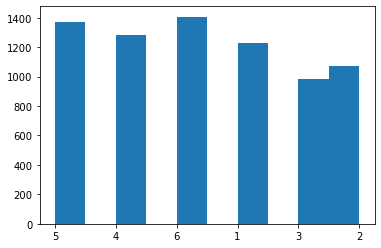

In [112]:

fname=folder+'train/y_train.txt'
flist=getY(fname)
plt.hist(flist)
plt.show()
# 라벨데이터가 균등하다-> 별도의 데이터 증폭 처리는 필요 없음
# 이산형 자료로 분류 모델에 적합하다
# 센서 데이터-> DT 사용 가능(확률적 센서 오류는 매우 적음)

In [114]:
import re
fname=folder+'test/X_test.txt'

def getX(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist=fread.split('\n')
    res=[]
    for f in flist:
        freg=re.compile("\s+").split(f.strip())
        if(freg):
            res.append(freg)
    print(_fname,"처리완료:",len(res))
    return(res)

In [115]:
def getData():
    fname=folder+'test/X_test.txt'
    X_test=getX(fname)
    fname=folder+'test/y_test.txt'
    y_test=getY(fname)
    fname=folder+'train/X_train.txt'
    X_train=getX(fname)
    fname=folder+'train/y_train.txt'
    y_train=getY(fname)
    return (X_train,X_test,y_train,y_test)

In [119]:
X_train,X_test,y_train,y_test=getData()



UCI_HAR/test/X_test.txt 처리완료: 2948
UCI_HAR/test/y_test.txt 처리완료: 2947
UCI_HAR/train/X_train.txt 처리완료: 7353
UCI_HAR/train/y_train.txt 처리완료: 7352


2947

In [121]:
X_test=X_test[:2947]

X_train=X_train[:7352]
print(len(X_train),len(X_test))

7352 2947


In [122]:
coldf=pd.read_csv(folder+'features.txt',
                  sep='\s+',
                  header=None,
                  names=['idx','cname']).set_index('idx')

coldf.head()

,cname
idx,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y


In [123]:
Xtraindf=pd.DataFrame(data=X_train,columns=coldf['cname'].values).fillna(0)
Xtraindf.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,1.5807454e-001,-5.9505094e-001,-8.6149931e-001,5.3476955e-002,-7.4345661e-003,-7.3262621e-001,7.0351059e-001,-8.4478760e-001,1.8028889e-001,-5.4316717e-002
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,4.1450281e-001,-3.9074815e-001,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,4.0457253e-001,-1.1729020e-001,-4.8284451e-001,-3.6787973e-002,-1.2892494e-002,6.4001104e-001,-4.8536645e-001,-8.4864938e-001,1.8193476e-001,-4.7663183e-002
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,8.7753013e-002,-3.5147093e-001,-6.9920515e-001,1.2332005e-001,1.2254196e-001,6.9357829e-001,-6.1597061e-001,-8.4786525e-001,1.8515116e-001,-4.3892254e-002


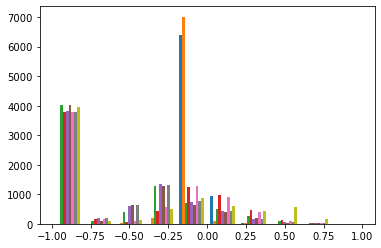

In [124]:
sdata=Xtraindf.iloc[:,1:10].values.astype(float)
plt.hist(sdata)
plt.show()

In [125]:
X_train=X_train[:7352]
len(X_train)

7352

In [126]:
from sklearn.metrics import accuracy_score

DecisionTreeClassifier()

In [139]:
def checkDT(_dep):
    dtc=DecisionTreeClassifier(max_depth=_dep)
    dtc.fit(X_train,y_train)
    pred=dtc.predict(X_test)
    accres=accuracy_score(pred,y_test)
    return(_dep,accres)

In [145]:
res=[]
for i in range(1,30):
    res.append(checkDT(i))

In [182]:
rdf=pd.DataFrame(data=res,columns=['dep','acc']).set_index('dep')
rdf.max()

acc    0.874788
dtype: float64

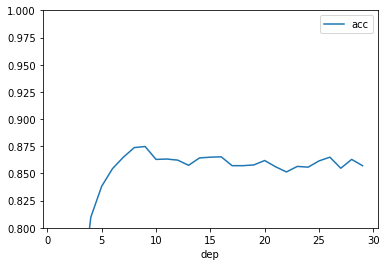

In [148]:
rdf.plot()
plt.ylim(0.8,1.0)
plt.show()

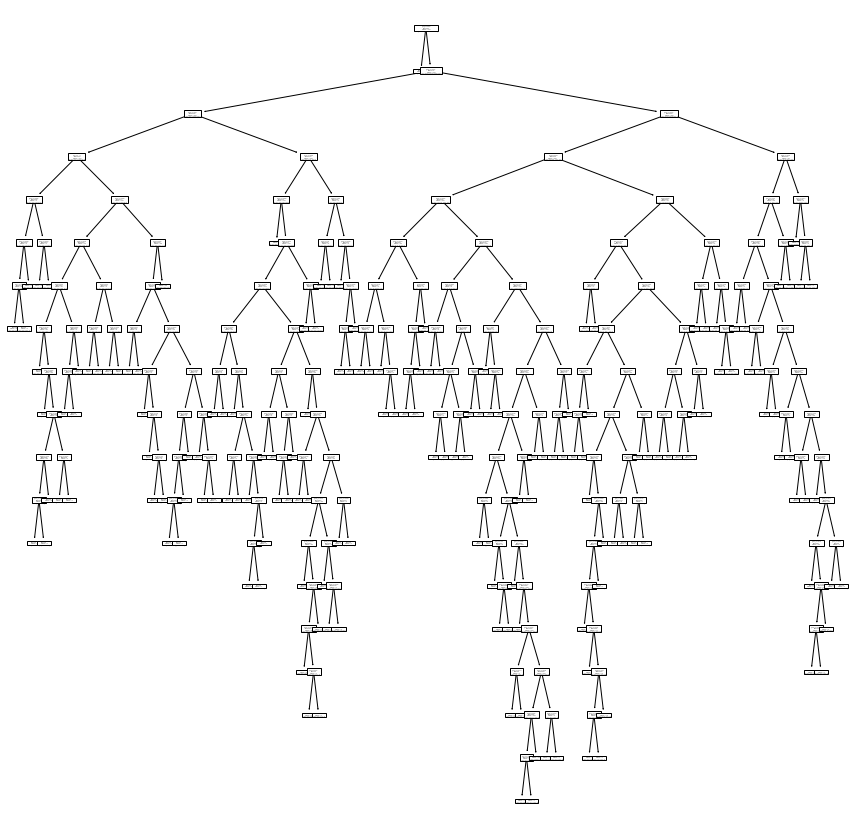

In [149]:
from sklearn.tree import plot_tree
fig,ax=plt.subplots(figsize=(15,15))
plot_tree(dtc)
plt.show()

In [178]:
# 중요 요소 검사
fimp=dtc.feature_importances_
zimp=list(zip(coldf['cname'],fimp))
impdf=pd.DataFrame(zimp,columns=['col','imp']).set_index('col')
sortdf=impdf.sort_values(by='imp',ascending=False)
sortdf.head()

,imp
col,
tGravityAcc-min()-X,0.239945
fBodyAcc-mad()-X,0.201332
"angle(Y,gravityMean)",0.136778
fBodyAccMag-energy(),0.109366
"tGravityAcc-arCoeff()-Z,2",0.096173


<AxesSubplot:xlabel='col'>

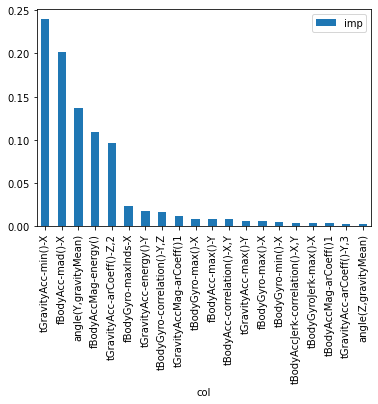

In [181]:
timp20=sortdf[:20]
timp20.plot.bar()


In [160]:
import seaborn as sns

In [161]:
sns.barplot(y=coldf['cname'].values,x=timp20)
plt.show()

ValueError: Grouper and axis must be same length